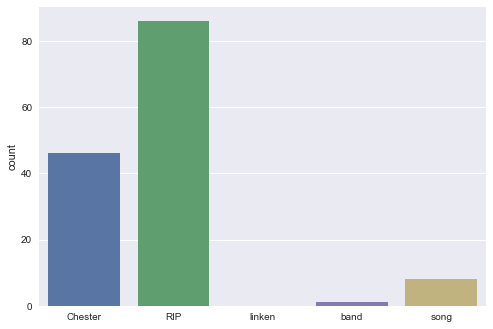

In [91]:
import tweepy
import json
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from collections import counter

tweets=[]

access_token = "access_token"
token_secret = "token_secret"
consumer_key = "consumer_key"
consumer_secret = "consumer_secret"

def authentication(access_token,token_secret,consumer_key,consumer_secret):
    #authenticates the user and return the authantication object

    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_token_secret)
    return auth
    
#file=open('C:\\Users\\MP\\Desktop\\datascience\\tweets.txt','w')
#for using twitter api and getting the whole user and its data
'''
api=tweepy.API(auth)
user=api.get_user('djppatidar')
print(user.followers_count)

for friend in user.friends():
    print('friend.name')'''


class MyStreamListener(tweepy.StreamListener):
# for accessing twitter streaming api 
    
    def on_status(self, status):
        
        #file.write(json.dumps(status._json)+'\n')
        #getting the streaming tweets and appending it to tweets list
        tweets.append(status._json)
       
        if len(tweets)==100:      
            #for limiting the tweets to n number
            return False
        else:
            return True
        
def word_in_text(word, tweet):
#checks if the given word is there in the tweet or not and returns true or false depending on match
    
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

def filter_track(hashtag): 
# authenticate the user using authenticate function and filters tweet with hashtag  
    
    auth = authentication(access_token,token_secret,consumer_key,consumer_secret)
    myStreamListener = MyStreamListener()
    myStream = tweepy.Stream(auth,myStreamListener)
    myStream.filter(track=[hashtag])
    
    
def check_word_frequency(hashtag,word_list):
#checks the frequancy of the given word/list_of_words and plot the frequancy of the words 
    
    filter_track(hashtag)
    word_value=np.zeros((len(word_list)), dtype=np.int).tolist()
    tweet_dataframe=pd.DataFrame(tweets,columns=['text','lang'])
    #print(tweet_dataframe)
    for index, row in tweet_dataframe.iterrows():
        for word in word_list:
            word_value[word_list.index(word)] += word_in_text(word, row['text'])
    sns.set(color_codes=True)
    # Plot histogram
    ax = sns.barplot(word_list,word_value)
    ax.set(ylabel="count")
    plt.show()

check_word_frequency('rip',['Chester','RIP','linken','band','song'])



You can just append this code in the above cell in the list iteration.
Here the tweets are saved in a File to reuse in below cell to save time of processing streaming tweets. 

In [92]:
#mines all word from tweet and check frequancies of all words
from collections import Counter
import operator
import nltk
import re
import json
import pandas as pd


#creating an empty list to store the text of tokenize strings(tweets)
text_only=[]
count=Counter()
with open('.\\tweets.txt','r') as file:
    
    for line in file:
        
        text=json.loads(line)
        tweet=(list(set(nltk.word_tokenize(text['text']))))
        for syn in tweet:
            if re.match("^[A-Za-z0-9_-]*$", syn):
                text_only.append(syn)
        count.update(hashtag)
    #print(type(count))
    
count_dict=dict(count) 
df=pd.DataFrame(list(count_dict.items()), columns=['text', 'count'])
print(df)



                     text  count
0                     2nd    600
1                       J    200
2                    FOUR    300
3              IndWvsAusW    550
4                   https   1350
5                Jonassen    200
6                      to    900
7                     ovs    450
8                    IndW    550
9           Krishnamurthy    250
10                      V    250
11   Semi-FinalLiveFollow    200
12                cricket   1200
13               AtvScore    200
14                      M    300
15                   Kaur    550
16                 Schutt    200
17                      H    250
18         Semi-FinalLive    350
19                    151     50
20                      5     50
21                    108     50
22                   Inns     50
23                    1st     50
24                     40     50
25                     of    700
26                    One    400
27                  WWC17    350
28                magical    150
29        